# 4-Feature Extraction: TF x IDF

- **Goal:** Prediction Recognition

- **Purpose:** Models cannot learn textual data, thus must convert data to what model can learn. That is numerical data. So, feature extraction is the process of doing this conversion from textual data to numerical data. TF (Text Frequency) x IDF (Inverse Document Frequency)

- **Core Idea of TF x IDF:** reflect how important a word is to an instance in the dataset [1]

- **Misc:**
    - `%store`: Cell magic will store the variable of interest so we can load in another notebook

In [1]:
import os
import sys

import pandas as pd

from IPython.display import Image

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

from feature_extraction import TfidfFeatureExtraction

In [2]:
%store -r shuffled_base_df
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
shuffled_base_df

Base Sentence  \
0                                                                                                                                                                          The music echoed through the empty hall.   
1             According to a policy analyst, Emily Chen, from the Congressional Budget Office, on 2024-08-22, the federal budget deficit is expected to decrease beyond $1 trillion in the timeframe of Q4 of 2027.   
2                                                          On 2024-10-15, Dr. David Lee, a health expert, predicts that the obesity rate at the World Health Organization will likely decrease by 3% in Q2 of 2026.   
3                       According to a senior level person from 3M, on 2024/08/22, the operating income is expected to increase as much as $500 million, reflecting a 20% increase, in the timeframe of Q2 of 2029.   
4                                                          On 2024-10-15, Rachel Patel, a financial analyst, predicts that the operating income at General Motors will likely increase by $5 billion in Q2 of 2026.   
5                                                                                                                                                                          She practiced yoga on the quiet morning.   
6                                                                                                                                                                           He played with his dog in the backyard.   
7                                                                                                                                                                       The kids played tag in the park playground.   
8                                                                                                                                                                        They went to the movies on a Friday night.   
9                                                                                                                                                                         He ate a healthy breakfast every morning.   
10                  According to a top executive from the Meteorological Service of Canada, on 2024-11-25, the snowfall levels in Toronto are expected to increase beyond 20 inches in the timeframe of 2026-02-01.   
11                                                                                                                                                                            She read a book under the tree shade.   
12                                                                                                                                                                     He listened to his favorite podcast episode.   
13                                                                                                                                                                        The flowers bloomed in the warm sunlight.   
14       In Q4 of 2027, the number of students enrolled in online courses in the United States is expected to be 10 million, which is a 25% increase, as predicted by Daniel Hall, a policy analyst, on 2024-08-24.   
15                                                                                                                                                                            He played chess with his grandfather.   
16       According to a senior level person, Lisa Nguyen, from the Department of Commerce, on 2024-10-11, the international trade volume is expected to increase beyond $20 billion in the timeframe of Q3 of 2029.   
17                                                                                                                                                                            The rain fell gently on the roof top.   
18                       In 2028-03-01, the average wind speed in Chicago has a probability of 10% to decrease, a

- Document = each row
- Corpus = entire column

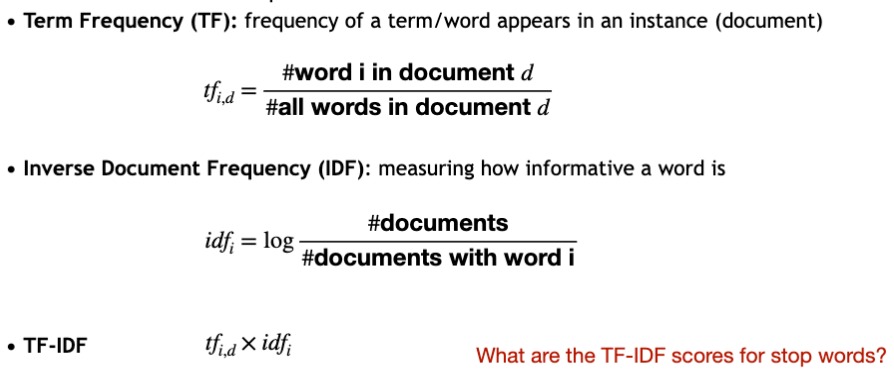

In [4]:
Image(filename='../misc/tfidf.png')

- Image [1]
- `fit_transform()`: vectorizes the text data by converting it into numerical form.
    - `fit()`: Learns the vocab and IDF
    - `transform()`: Converts the text data into a matrix of TF-IDF features using `fit()`
    - vectorize each row
    - output:
        - stored elements: #TF-IDF scores (thus not 0)  
        - rows: The #rows/#documents
        - columns: The #columns/#unique terms (features) in the entire corpus
            - NOT the same as the input #columns
            - NOTE: Changes as the generated predictions and non-predictions change (due to running code to generate evertime this notebook is ran).

In [5]:
max_features = None

tf_idf_feature_extractor = TfidfFeatureExtraction(shuffled_base_df, 'Base Sentence')
tfidf_vectorized_features = tf_idf_feature_extractor.word_feature_extraction(max_features)
tfidf_vectorized_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1298 stored elements and shape (80, 440)>

In [6]:
tfidf_vectorized_features_df = tf_idf_feature_extractor.feature_scores(max_features)
tfidf_vectorized_features_df

Base Sentence  \
0                                                                                                                                                                          The music echoed through the empty hall.   
1             According to a policy analyst, Emily Chen, from the Congressional Budget Office, on 2024-08-22, the federal budget deficit is expected to decrease beyond $1 trillion in the timeframe of Q4 of 2027.   
2                                                          On 2024-10-15, Dr. David Lee, a health expert, predicts that the obesity rate at the World Health Organization will likely decrease by 3% in Q2 of 2026.   
3                       According to a senior level person from 3M, on 2024/08/22, the operating income is expected to increase as much as $500 million, reflecting a 20% increase, in the timeframe of Q2 of 2029.   
4                                                          On 2024-10-15, Rachel Patel, a financial analyst, predicts that the operating income at General Motors will likely increase by $5 billion in Q2 of 2026.   
5                                                                                                                                                                          She practiced yoga on the quiet morning.   
6                                                                                                                                                                           He played with his dog in the backyard.   
7                                                                                                                                                                       The kids played tag in the park playground.   
8                                                                                                                                                                        They went to the movies on a Friday night.   
9                                                                                                                                                                         He ate a healthy breakfast every morning.   
10                  According to a top executive from the Meteorological Service of Canada, on 2024-11-25, the snowfall levels in Toronto are expected to increase beyond 20 inches in the timeframe of 2026-02-01.   
11                                                                                                                                                                            She read a book under the tree shade.   
12                                                                                                                                                                     He listened to his favorite podcast episode.   
13                                                                                                                                                                        The flowers bloomed in the warm sunlight.   
14       In Q4 of 2027, the number of students enrolled in online courses in the United States is expected to be 10 million, which is a 25% increase, as predicted by Daniel Hall, a policy analyst, on 2024-08-24.   
15                                                                                                                                                                            He played chess with his grandfather.   
16       According to a senior level person, Lisa Nguyen, from the Department of Commerce, on 2024-10-11, the international trade volume is expected to increase beyond $20 billion in the timeframe of Q3 of 2029.   
17                                                                                                                                                                            The rain fell gently on the roof top.   
18                       In 2028-03-01, the average wind speed in Chicago has a probability of 10% to decrease, a

In [7]:
# %store shuffled_df
%store tfidf_vectorized_features_df

Stored 'tfidf_vectorized_features_df' (DataFrame)


# References

1. LECTURE: [Text Classification](https://www.notion.so/detraviousjbrinkley/L2-Text-Classification-09badf17ee434145b02014e4b6d63309?pvs=4#4ee7f90851444a989e61cb0bdaa2d965) by Xuezhe Ma, Spring 2024 Professor of CSCI-544: Applied Natural Language Processing (NLP) at the University of Southern California